In [4]:
import pandas as pd
import numpy as np
from mlxtend.plotting import plot_decision_regions

In [3]:
!pip install mlxtend

In [6]:
df=pd.DataFrame()

In [7]:
df["X1"]=[1,2,3,4,5,6,6,7,9,9]
df["X2"]=[5,3,6,8,1,9,5,8,9,2]
df["label"]=[1,1,0,1,0,1,0,1,0,0]

In [8]:
df

,X1,X2,label
0,1,5,1
1,2,3,1
2,3,6,0
3,4,8,1
4,5,1,0
5,6,9,1
6,6,5,0
7,7,8,1
8,9,9,0
9,9,2,0


In [9]:
import seaborn as sns

<AxesSubplot:xlabel='X1', ylabel='X2'>

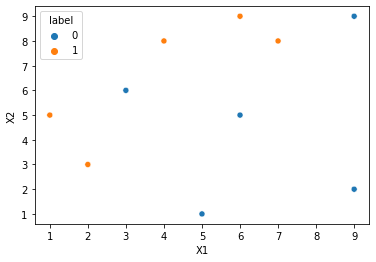

In [11]:
sns.scatterplot(x=df["X1"],y=df["X2"],hue=df["label"])

In [14]:
df.shape

(10, 3)

In [13]:
#1/no. of rows
df.shape[0]

10

In [15]:
df["sample_weights"]=1/df.shape[0]

In [16]:
df

,X1,X2,label,sample_weights
0,1,5,1,0.1
1,2,3,1,0.1
2,3,6,0,0.1
3,4,8,1,0.1
4,5,1,0,0.1
5,6,9,1,0.1
6,6,5,0,0.1
7,7,8,1,0.1
8,9,9,0,0.1
9,9,2,0,0.1


In [33]:
from sklearn.tree import DecisionTreeClassifier
DT1=DecisionTreeClassifier(max_depth=1)

In [34]:
X=df.iloc[:,0:2]

In [35]:
y=df.iloc[:,2]

In [36]:
X

,X1,X2
0,1,5
1,2,3
2,3,6
3,4,8
4,5,1
5,6,9
6,6,5
7,7,8
8,9,9
9,9,2


In [37]:
y

0    1
1    1
2    0
3    1
4    0
5    1
6    0
7    1
8    0
9    0
Name: label, dtype: int64

In [38]:
DT1.fit(X,y)

DecisionTreeClassifier(max_depth=1)

In [39]:
from sklearn.tree import plot_tree

[Text(0.5, 0.75, 'X[1] <= 2.5\ngini = 0.5\nsamples = 10\nvalue = [5, 5]'),
 Text(0.25, 0.25, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(0.75, 0.25, 'gini = 0.469\nsamples = 8\nvalue = [3, 5]')]

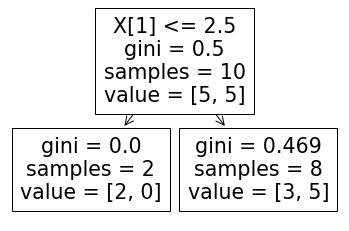

In [40]:
plot_tree(DT1)

In [41]:
np.array(X)

array([[1, 5],
       [2, 3],
       [3, 6],
       [4, 8],
       [5, 1],
       [6, 9],
       [6, 5],
       [7, 8],
       [9, 9],
       [9, 2]], dtype=int64)

C:\Users\sunny\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


<AxesSubplot:>

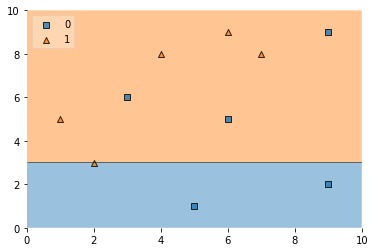

In [42]:
plot_decision_regions(np.array(X), np.array(y), clf=DT1, legend=2)

In [44]:
df['y_pred']=DT1.predict(X)

In [45]:
df

,X1,X2,label,sample_weights,y_pred
0,1,5,1,0.1,1
1,2,3,1,0.1,1
2,3,6,0,0.1,1
3,4,8,1,0.1,1
4,5,1,0,0.1,0
5,6,9,1,0.1,1
6,6,5,0,0.1,1
7,7,8,1,0.1,1
8,9,9,0,0.1,1
9,9,2,0,0.1,0


In [46]:
#performance of the stump
def calculate_model_weight(error):
    return 0.5*np.log((1-error)/(error))
     

In [47]:
alpha1 = calculate_model_weight(0.3)
alpha1

0.42364893019360184

In [51]:
#calculate the updated weight

def update_row_weights(row,alpha=0.423):
    if row['label'] == row['y_pred']:
        return row['sample_weights'] * np.exp(-alpha)
    else:
        return row['sample_weights'] * np.exp(alpha)

In [52]:
df['updated_weights'] = df.apply(update_row_weights,axis=1)

In [53]:
df

,X1,X2,label,sample_weights,y_pred,updated_weights
0,1,5,1,0.1,1,0.065508
1,2,3,1,0.1,1,0.065508
2,3,6,0,0.1,1,0.152653
3,4,8,1,0.1,1,0.065508
4,5,1,0,0.1,0,0.065508
5,6,9,1,0.1,1,0.065508
6,6,5,0,0.1,1,0.152653
7,7,8,1,0.1,1,0.065508
8,9,9,0,0.1,1,0.152653
9,9,2,0,0.1,0,0.065508


In [54]:
df["sample_weights"].sum()

1.0

In [55]:
df["updated_weights"].sum()

0.9165153319682015

In [56]:
df['nomalized_weights'] = df['updated_weights']/df['updated_weights'].sum()

In [57]:
df

,X1,X2,label,sample_weights,y_pred,updated_weights,nomalized_weights
0,1,5,1,0.1,1,0.065508,0.071475
1,2,3,1,0.1,1,0.065508,0.071475
2,3,6,0,0.1,1,0.152653,0.166559
3,4,8,1,0.1,1,0.065508,0.071475
4,5,1,0,0.1,0,0.065508,0.071475
5,6,9,1,0.1,1,0.065508,0.071475
6,6,5,0,0.1,1,0.152653,0.166559
7,7,8,1,0.1,1,0.065508,0.071475
8,9,9,0,0.1,1,0.152653,0.166559
9,9,2,0,0.1,0,0.065508,0.071475


In [58]:
df["nomalized_weights"].sum()

1.0

In [59]:
np.cumsum(df['nomalized_weights'])

0    0.071475
1    0.142950
2    0.309508
3    0.380983
4    0.452458
5    0.523933
6    0.690492
7    0.761967
8    0.928525
9    1.000000
Name: nomalized_weights, dtype: float64

In [61]:
df['cumsum_upper'] = np.cumsum(df['nomalized_weights'])

df['cumsum_lower'] = df['cumsum_upper'] - df['nomalized_weights']

df[['X1','X2','label','sample_weights','y_pred','updated_weights','cumsum_lower','cumsum_upper']]


,X1,X2,label,sample_weights,y_pred,updated_weights,cumsum_lower,cumsum_upper
0,1,5,1,0.1,1,0.065508,0.000000,0.071475
1,2,3,1,0.1,1,0.065508,0.071475,0.142950
2,3,6,0,0.1,1,0.152653,0.142950,0.309508
3,4,8,1,0.1,1,0.065508,0.309508,0.380983
4,5,1,0,0.1,0,0.065508,0.380983,0.452458
5,6,9,1,0.1,1,0.065508,0.452458,0.523933
6,6,5,0,0.1,1,0.152653,0.523933,0.690492
7,7,8,1,0.1,1,0.065508,0.690492,0.761967
8,9,9,0,0.1,1,0.152653,0.761967,0.928525
9,9,2,0,0.1,0,0.065508,0.928525,1.000000


In [76]:
# i want to do random sampling for my next DT
# generating 10 random weights

indexes=[]

for i in range(df.shape[0]):
    a=np.random.random()
    for index,row in df.iterrows():
        if row['cumsum_upper']>a and a>row["cumsum_lower"]:
            indexes.append(index)
        
            

In [77]:
indexes

[8, 3, 5, 4, 9, 8, 8, 8, 2, 4]

In [80]:
second_df=df.iloc[indexes][["X1","X2","label","sample_weights"]]

In [81]:
second_df

,X1,X2,label,sample_weights
8,9,9,0,0.1
3,4,8,1,0.1
5,6,9,1,0.1
4,5,1,0,0.1
9,9,2,0,0.1
8,9,9,0,0.1
8,9,9,0,0.1
8,9,9,0,0.1
2,3,6,0,0.1
4,5,1,0,0.1


In [93]:
from sklearn.tree import DecisionTreeClassifier
DT2=DecisionTreeClassifier(max_depth=1)

In [94]:
X = second_df.iloc[:,0:2].values
y = second_df.iloc[:,2].values

In [98]:
X

array([[9, 9],
       [4, 8],
       [6, 9],
       [5, 1],
       [9, 2],
       [9, 9],
       [9, 9],
       [9, 9],
       [3, 6],
       [5, 1]], dtype=int64)

In [95]:
DT2.fit(X,y)

DecisionTreeClassifier(max_depth=1)

[Text(0.5, 0.75, 'X[0] <= 7.5\ngini = 0.32\nsamples = 10\nvalue = [8, 2]'),
 Text(0.25, 0.25, 'gini = 0.48\nsamples = 5\nvalue = [3, 2]'),
 Text(0.75, 0.25, 'gini = 0.0\nsamples = 5\nvalue = [5, 0]')]

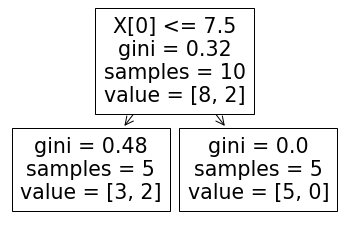

In [96]:
plot_tree(DT2)

C:\ProgramData\Anaconda3\lib\site-packages\mlxtend\plotting\decision_regions.py:315: UserWarning: No contour levels were found within the data range.
  ax.contour(xx, yy, Z, cset.levels, **contour_kwargs)


<AxesSubplot:>

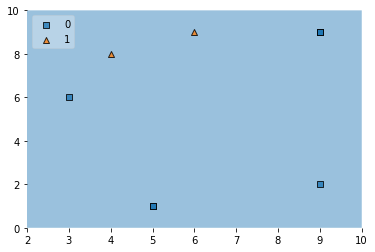

In [97]:
plot_decision_regions(X,y,clf=DT2,legend=2)

In [100]:
second_df["y_pred"]=DT2.predict(X)

In [101]:
second_df

,X1,X2,label,sample_weights,y_pred
8,9,9,0,0.1,0
3,4,8,1,0.1,0
5,6,9,1,0.1,0
4,5,1,0,0.1,0
9,9,2,0,0.1,0
8,9,9,0,0.1,0
8,9,9,0,0.1,0
8,9,9,0,0.1,0
2,3,6,0,0.1,0
4,5,1,0,0.1,0


In [102]:
alpha2 = calculate_model_weight(0.2)

In [103]:
alpha2

0.6931471805599453

In [106]:
def update_row_weights(row,alpha=0.69):
    if row['label'] == row['y_pred']:
        return row['sample_weights'] * np.exp(-alpha)
    else:
        return row['sample_weights'] * np.exp(alpha)

In [107]:
second_df['updated_weights'] = second_df.apply(update_row_weights,axis=1)

In [108]:
second_df

,X1,X2,label,sample_weights,y_pred,updated_weights
8,9,9,0,0.1,0,0.050158
3,4,8,1,0.1,0,0.199372
5,6,9,1,0.1,0,0.199372
4,5,1,0,0.1,0,0.050158
9,9,2,0,0.1,0,0.050158
8,9,9,0,0.1,0,0.050158
8,9,9,0,0.1,0,0.050158
8,9,9,0,0.1,0,0.050158
2,3,6,0,0.1,0,0.050158
4,5,1,0,0.1,0,0.050158


In [109]:
second_df['nomalized_weights'] = second_df['updated_weights']/second_df['updated_weights'].sum()

In [110]:
second_df


,X1,X2,label,sample_weights,y_pred,updated_weights,nomalized_weights
8,9,9,0,0.1,0,0.050158,0.062697
3,4,8,1,0.1,0,0.199372,0.249213
5,6,9,1,0.1,0,0.199372,0.249213
4,5,1,0,0.1,0,0.050158,0.062697
9,9,2,0,0.1,0,0.050158,0.062697
8,9,9,0,0.1,0,0.050158,0.062697
8,9,9,0,0.1,0,0.050158,0.062697
8,9,9,0,0.1,0,0.050158,0.062697
2,3,6,0,0.1,0,0.050158,0.062697
4,5,1,0,0.1,0,0.050158,0.062697


In [111]:
second_df['cumsum_upper'] = np.cumsum(second_df['nomalized_weights'])

second_df['cumsum_lower'] = second_df['cumsum_upper'] - second_df['nomalized_weights']

second_df[['X1','X2','label','sample_weights','y_pred','updated_weights','cumsum_lower','cumsum_upper']]


,X1,X2,label,sample_weights,y_pred,updated_weights,cumsum_lower,cumsum_upper
8,9,9,0,0.1,0,0.050158,0.000000,0.062697
3,4,8,1,0.1,0,0.199372,0.062697,0.311910
5,6,9,1,0.1,0,0.199372,0.311910,0.561123
4,5,1,0,0.1,0,0.050158,0.561123,0.623820
9,9,2,0,0.1,0,0.050158,0.623820,0.686517
8,9,9,0,0.1,0,0.050158,0.686517,0.749213
8,9,9,0,0.1,0,0.050158,0.749213,0.811910
8,9,9,0,0.1,0,0.050158,0.811910,0.874607
2,3,6,0,0.1,0,0.050158,0.874607,0.937303
4,5,1,0,0.1,0,0.050158,0.937303,1.000000


In [114]:
# i want to do random sampling for my next DT
# generating 10 random weights

indexes=[]

for i in range(second_df.shape[0]):
    a=np.random.random()
    for index,row in second_df.iterrows():
        if row['cumsum_upper']>a and a>row["cumsum_lower"]:
            indexes.append(index)
        
            

In [115]:
indexes

[3, 8, 5, 9, 8, 2, 5, 8, 4, 5]

In [117]:
third_df=second_df.iloc[indexes]

In [118]:
third_df

,X1,X2,label,sample_weights,y_pred,updated_weights,nomalized_weights,cumsum_upper,cumsum_lower
4,5,1,0,0.1,0,0.050158,0.062697,0.623820,0.561123
2,3,6,0,0.1,0,0.050158,0.062697,0.937303,0.874607
8,9,9,0,0.1,0,0.050158,0.062697,0.749213,0.686517
4,5,1,0,0.1,0,0.050158,0.062697,1.000000,0.937303
2,3,6,0,0.1,0,0.050158,0.062697,0.937303,0.874607
5,6,9,1,0.1,0,0.199372,0.249213,0.561123,0.311910
8,9,9,0,0.1,0,0.050158,0.062697,0.749213,0.686517
2,3,6,0,0.1,0,0.050158,0.062697,0.937303,0.874607
9,9,2,0,0.1,0,0.050158,0.062697,0.686517,0.623820
8,9,9,0,0.1,0,0.050158,0.062697,0.749213,0.686517


In [119]:
#final prediction

# additive modeling

## final_prediction=alpha1*DT1+alpha2*DT2

In [121]:
print(alpha1, alpha2)

0.42364893019360184 0.6931471805599453


In [125]:
query=np.array([[5,1]])

In [126]:
DT1.predict(query)

C:\Users\sunny\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([0], dtype=int64)

In [127]:
DT2.predict(query)

array([0], dtype=int64)

In [129]:
f=alpha1*(-1)+alpha2*(-1)

In [131]:
final_prd=np.sign(f)

In [132]:
final_prd

-1.0

In [133]:
query2=np.array([[6,9]])

In [134]:
DT1.predict(query2)

C:\Users\sunny\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1], dtype=int64)

In [135]:
DT2.predict(query2)

array([0], dtype=int64)

In [136]:
f2=alpha1*(1)+alpha2*(-1)

In [138]:
f2

-0.26949825036634345

In [139]:
np.sign(f2)

-1.0

# Gredient Boosting

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df=pd.DataFrame()

In [3]:
df

""


In [4]:
np.random.seed(42)

In [5]:
X=np.random.rand(100,1)-0.5

In [6]:
X

array([[-0.12545988],
       [ 0.45071431],
       [ 0.23199394],
       [ 0.09865848],
       [-0.34398136],
       [-0.34400548],
       [-0.44191639],
       [ 0.36617615],
       [ 0.10111501],
       [ 0.20807258],
       [-0.47941551],
       [ 0.46990985],
       [ 0.33244264],
       [-0.28766089],
       [-0.31817503],
       [-0.31659549],
       [-0.19575776],
       [ 0.02475643],
       [-0.06805498],
       [-0.20877086],
       [ 0.11185289],
       [-0.36050614],
       [-0.20785535],
       [-0.13363816],
       [-0.04393002],
       [ 0.28517596],
       [-0.30032622],
       [ 0.01423444],
       [ 0.09241457],
       [-0.45354959],
       [ 0.10754485],
       [-0.32947588],
       [-0.43494841],
       [ 0.44888554],
       [ 0.46563203],
       [ 0.30839735],
       [-0.19538623],
       [-0.40232789],
       [ 0.18423303],
       [-0.05984751],
       [-0.37796177],
       [-0.00482309],
       [-0.46561148],
       [ 0.4093204 ],
       [-0.24122002],
       [ 0

In [7]:
y = 3*X[:, 0]**2 + 0.05 * np.random.randn(100)

In [8]:
df["X"]=X.reshape(100)

In [9]:
df["y"]=y

In [10]:
df.head()

,X,y
0,-0.125460,0.051573
1,0.450714,0.594480
2,0.231994,0.166052
3,0.098658,-0.070178
4,-0.343981,0.343986


Text(0.5, 1.0, 'X vs y')

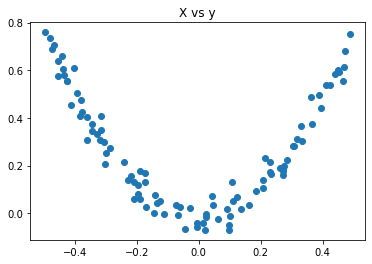

In [11]:
plt.scatter(df["X"],df["y"])
plt.title("X vs y")

In [12]:
df["pred1[base_model]"]=df["y"].mean()

In [13]:
df

,X,y,pred1[base_model]
0,-0.125460,0.051573,0.265458
1,0.450714,0.594480,0.265458
2,0.231994,0.166052,0.265458
3,0.098658,-0.070178,0.265458
4,-0.343981,0.343986,0.265458
...,...,...,...
95,-0.006204,-0.040675,0.265458
96,0.022733,-0.002305,0.265458
97,-0.072459,0.032809,0.265458
98,-0.474581,0.689516,0.265458


In [14]:
df["res1"]=df["y"]-df["pred1[base_model]"]

In [15]:
df

,X,y,pred1[base_model],res1
0,-0.125460,0.051573,0.265458,-0.213885
1,0.450714,0.594480,0.265458,0.329021
2,0.231994,0.166052,0.265458,-0.099407
3,0.098658,-0.070178,0.265458,-0.335636
4,-0.343981,0.343986,0.265458,0.078528
...,...,...,...,...
95,-0.006204,-0.040675,0.265458,-0.306133
96,0.022733,-0.002305,0.265458,-0.267763
97,-0.072459,0.032809,0.265458,-0.232650
98,-0.474581,0.689516,0.265458,0.424057


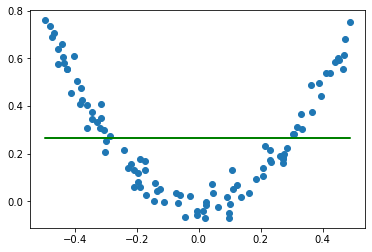

In [16]:
plt.scatter(df["X"],df["y"])
plt.plot(df["X"],df["pred1[base_model]"],color="green")

In [17]:
# i am going to train my first DT model on top of residual

# X, res1

X=df["X"].values.reshape(100,1)

In [18]:
y=df["res1"].values

In [19]:
y

array([-0.2138855 ,  0.32902139, -0.09940679, -0.33563635,  0.07852754,
        0.10741654,  0.39430659,  0.110883  , -0.27521034, -0.16066366,
        0.46982939,  0.41342497,  0.03960792,  0.00845134,  0.04310154,
        0.08367197, -0.18559775, -0.28000286, -0.27116936, -0.20787833,
       -0.21311917,  0.1374884 , -0.13559118, -0.22361028, -0.33043739,
       -0.04251468, -0.01200661, -0.3049644 , -0.24790132,  0.37186583,
       -0.13645142,  0.06893355,  0.31495947,  0.33531398,  0.28904261,
        0.01854268, -0.14791955,  0.34330689, -0.17325102, -0.23963586,
        0.1613713 , -0.32382251,  0.44206489,  0.27476783, -0.05134551,
       -0.23168729, -0.08896052, -0.33434277, -0.22956999,  0.14201453,
        0.34654395, -0.06667907,  0.31900213,  0.17703373, -0.31423835,
        0.27190336,  0.18944168,  0.03550048,  0.30902505, -0.0964332 ,
       -0.26744282, -0.12471768,  0.09942251, -0.26544278, -0.11011633,
       -0.19463239,  0.04097368,  0.01774234,  0.29055721,  0.48

In [20]:
from sklearn.tree import DecisionTreeRegressor
DT1=DecisionTreeRegressor(max_leaf_nodes=8)
DT1.fit(X,y)

DecisionTreeRegressor(max_leaf_nodes=8)

In [21]:
from sklearn.tree import plot_tree

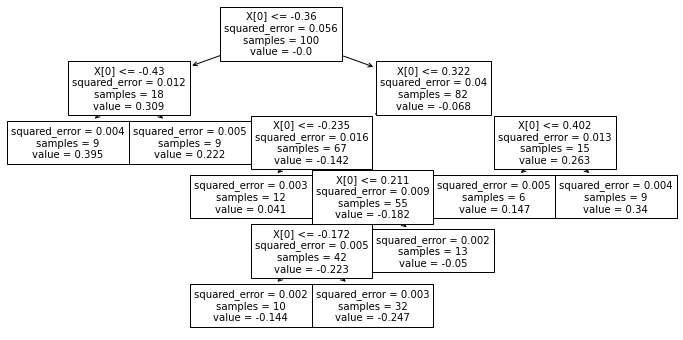

In [22]:
plt.figure(figsize=(12,6))
plot_tree(DT1)
plt.show()


In [23]:
X

array([[-0.12545988],
       [ 0.45071431],
       [ 0.23199394],
       [ 0.09865848],
       [-0.34398136],
       [-0.34400548],
       [-0.44191639],
       [ 0.36617615],
       [ 0.10111501],
       [ 0.20807258],
       [-0.47941551],
       [ 0.46990985],
       [ 0.33244264],
       [-0.28766089],
       [-0.31817503],
       [-0.31659549],
       [-0.19575776],
       [ 0.02475643],
       [-0.06805498],
       [-0.20877086],
       [ 0.11185289],
       [-0.36050614],
       [-0.20785535],
       [-0.13363816],
       [-0.04393002],
       [ 0.28517596],
       [-0.30032622],
       [ 0.01423444],
       [ 0.09241457],
       [-0.45354959],
       [ 0.10754485],
       [-0.32947588],
       [-0.43494841],
       [ 0.44888554],
       [ 0.46563203],
       [ 0.30839735],
       [-0.19538623],
       [-0.40232789],
       [ 0.18423303],
       [-0.05984751],
       [-0.37796177],
       [-0.00482309],
       [-0.46561148],
       [ 0.4093204 ],
       [-0.24122002],
       [ 0

In [ ]:
final_model=BASE+alpha(DT1)alpha(DT1)alpha(DT1)alpha(DT1)

In [25]:
#unknown test data
X_test=np.linspace(-0.5,0.5,500)

In [26]:
X_test

array([-0.5       , -0.49799599, -0.49599198, -0.49398798, -0.49198397,
       -0.48997996, -0.48797595, -0.48597194, -0.48396794, -0.48196393,
       -0.47995992, -0.47795591, -0.4759519 , -0.4739479 , -0.47194389,
       -0.46993988, -0.46793587, -0.46593186, -0.46392786, -0.46192385,
       -0.45991984, -0.45791583, -0.45591182, -0.45390782, -0.45190381,
       -0.4498998 , -0.44789579, -0.44589178, -0.44388778, -0.44188377,
       -0.43987976, -0.43787575, -0.43587174, -0.43386774, -0.43186373,
       -0.42985972, -0.42785571, -0.4258517 , -0.4238477 , -0.42184369,
       -0.41983968, -0.41783567, -0.41583166, -0.41382766, -0.41182365,
       -0.40981964, -0.40781563, -0.40581162, -0.40380762, -0.40180361,
       -0.3997996 , -0.39779559, -0.39579158, -0.39378758, -0.39178357,
       -0.38977956, -0.38777555, -0.38577154, -0.38376754, -0.38176353,
       -0.37975952, -0.37775551, -0.3757515 , -0.37374749, -0.37174349,
       -0.36973948, -0.36773547, -0.36573146, -0.36372745, -0.36

In [29]:
BASE=df["pred1[base_model]"]

In [33]:
alpha=0.1

In [35]:
#without alpha(LR)
y_pred=BASE[0]+(DT1.predict(X_test.reshape(500,1)))

In [36]:
#with alpha
y_pred1=BASE[0]+(alpha*DT1.predict(X_test.reshape(500,1)))

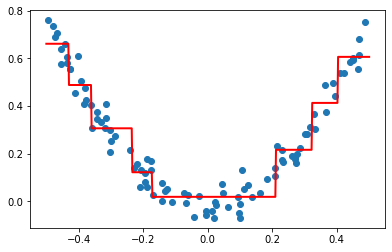

In [38]:
plt.figure(figsize=(14,4))
plt.subplot(121)
plt.plot(X_test, y_pred, linewidth=2,color='red')
plt.scatter(df["X"],df["y"])

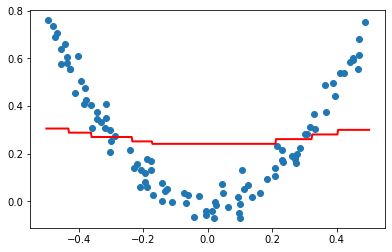

In [39]:
plt.figure(figsize=(14,4))
plt.subplot(121)
plt.plot(X_test, y_pred1, linewidth=2,color='red')
plt.scatter(df["X"],df["y"])

In [24]:
DT1.score(X,y)

0.94048065003866

In [196]:
df["pred2"]=DT1.predict(X)

In [197]:
df

,X,y,pred1[base_model],res1,pred2
0,-0.125460,0.051573,0.265458,-0.213885,-0.247139
1,0.450714,0.594480,0.265458,0.329021,0.340426
2,0.231994,0.166052,0.265458,-0.099407,-0.049674
3,0.098658,-0.070178,0.265458,-0.335636,-0.247139
4,-0.343981,0.343986,0.265458,0.078528,0.040506
...,...,...,...,...,...
95,-0.006204,-0.040675,0.265458,-0.306133,-0.247139
96,0.022733,-0.002305,0.265458,-0.267763,-0.247139
97,-0.072459,0.032809,0.265458,-0.232650,-0.247139
98,-0.474581,0.689516,0.265458,0.424057,0.395454


In [ ]:
res2=act-(BASE+alpha*pred2)

In [199]:
BASE=df["pred1[base_model]"]

In [200]:
alpha=0.1

In [203]:
df["res2"]=df["y"]-(BASE+(alpha*df["pred2"]))

In [204]:
df

,X,y,pred1[base_model],res1,pred2,res2
0,-0.125460,0.051573,0.265458,-0.213885,-0.247139,-0.189172
1,0.450714,0.594480,0.265458,0.329021,0.340426,0.294979
2,0.231994,0.166052,0.265458,-0.099407,-0.049674,-0.094439
3,0.098658,-0.070178,0.265458,-0.335636,-0.247139,-0.310922
4,-0.343981,0.343986,0.265458,0.078528,0.040506,0.074477
...,...,...,...,...,...,...
95,-0.006204,-0.040675,0.265458,-0.306133,-0.247139,-0.281420
96,0.022733,-0.002305,0.265458,-0.267763,-0.247139,-0.243049
97,-0.072459,0.032809,0.265458,-0.232650,-0.247139,-0.207936
98,-0.474581,0.689516,0.265458,0.424057,0.395454,0.384512


In [205]:
X=df["X"].values.reshape(100,1)
y=df["res2"].values

In [206]:
X

array([[-0.12545988],
       [ 0.45071431],
       [ 0.23199394],
       [ 0.09865848],
       [-0.34398136],
       [-0.34400548],
       [-0.44191639],
       [ 0.36617615],
       [ 0.10111501],
       [ 0.20807258],
       [-0.47941551],
       [ 0.46990985],
       [ 0.33244264],
       [-0.28766089],
       [-0.31817503],
       [-0.31659549],
       [-0.19575776],
       [ 0.02475643],
       [-0.06805498],
       [-0.20877086],
       [ 0.11185289],
       [-0.36050614],
       [-0.20785535],
       [-0.13363816],
       [-0.04393002],
       [ 0.28517596],
       [-0.30032622],
       [ 0.01423444],
       [ 0.09241457],
       [-0.45354959],
       [ 0.10754485],
       [-0.32947588],
       [-0.43494841],
       [ 0.44888554],
       [ 0.46563203],
       [ 0.30839735],
       [-0.19538623],
       [-0.40232789],
       [ 0.18423303],
       [-0.05984751],
       [-0.37796177],
       [-0.00482309],
       [-0.46561148],
       [ 0.4093204 ],
       [-0.24122002],
       [ 0

In [207]:
y

array([-0.18917161,  0.29497884, -0.09443935, -0.31092247,  0.07447691,
        0.10336592,  0.35476119,  0.09616931, -0.25049645, -0.13594977,
        0.430284  ,  0.37938241,  0.02489423,  0.00440072,  0.03905091,
        0.07962134, -0.1712113 , -0.25528897, -0.24645548, -0.19349187,
       -0.18840529,  0.11525455, -0.12120473, -0.1988964 , -0.30572351,
       -0.03754724, -0.01605723, -0.28025052, -0.22318744,  0.33232044,
       -0.11173753,  0.06488293,  0.27541408,  0.30127143,  0.25500006,
        0.02351012, -0.13353309,  0.32107305, -0.14853713, -0.21492197,
        0.13913746, -0.29910862,  0.4025195 ,  0.24072528, -0.05539613,
       -0.2069734 , -0.07457407, -0.30962889, -0.2048561 ,  0.13796391,
        0.3125014 , -0.06171163,  0.28495958,  0.16232004, -0.28952446,
        0.23786081,  0.16720784,  0.03144986,  0.26947965, -0.08204674,
       -0.24272894, -0.11033122,  0.08470883, -0.2407289 , -0.09572988,
       -0.16991851,  0.03692306,  0.02270978,  0.26832337,  0.45

In [208]:
from sklearn.tree import DecisionTreeRegressor
DT2=DecisionTreeRegressor(max_leaf_nodes=8)
DT2.fit(X,y)

DecisionTreeRegressor(max_leaf_nodes=8)

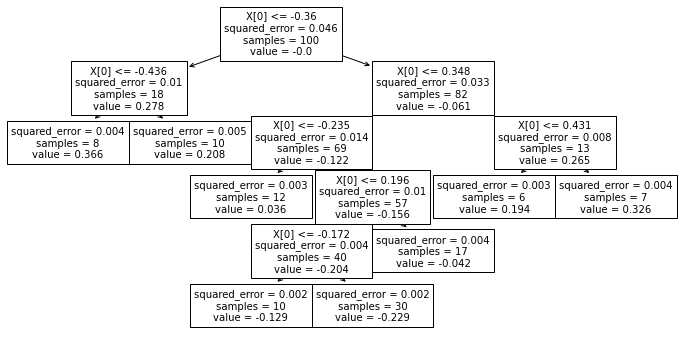

In [209]:
plt.figure(figsize=(12,6))
plot_tree(DT2)
plt.show()


In [ ]:
## res3

## and you need to check it getting reduced or not

In [ ]:
final_pred=BASE+(alpha*DT1)+(alpha*DT2)

In [210]:
query=[[0.45071431]]

In [214]:
pred1=DT1.predict(query)

In [215]:
pred1

array([0.34042552])

In [216]:
pred2=DT2.predict(query)

In [217]:
pred2

array([0.32555151])

In [218]:
alpha

0.1

In [219]:
BASE[0]

0.2654583966967982

In [221]:
final_pred=BASE[0]+(alpha*pred1)+(alpha*pred2)

In [222]:
final_pred

array([0.3320561])